# Task 1 - Setup and Data Preparation

- Import necessary packages for executing the code
- Install the EMNIST package
- Load the EMINST (letters) data and study its basic features such as its shape
- Convert the pixel gray levels of the images into the range [0,1]
- One-hot encode the class labels in the data
- Flatten the image data into 1-D arrays

In [21]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import methods for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from scikeras.wrappers import KerasClassifier, KerasRegressor

# Import method to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load the 'fashion_mnist' package from 'keras'
from keras.datasets import fashion_mnist

In [23]:
# Load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [24]:
print('Train data shape: ', X_train.shape) # (124800, 28, 28) --- 124800 images, each 28x28 pixels
print('Test data shape: ', X_test.shape) # (20800, 28, 28) --- 20800 images, each 28x28

Train data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)


In [25]:
# Look at the frequency of the unique class labels in the training data
unique,counts = np.unique(y_train,return_counts=True)
print('Train Labels :',dict(zip(unique,counts)))

unique,counts = np.unique(y_test,return_counts=True)
print('Test Labels :',dict(zip(unique,counts)))

print('\n')
print('Note that the labels 1, 2, 3, ..., 26 represent the 26 letters of the English alphabet.')

Train Labels : {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}
Test Labels : {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


Note that the labels 1, 2, 3, ..., 26 represent the 26 letters of the English alphabet.


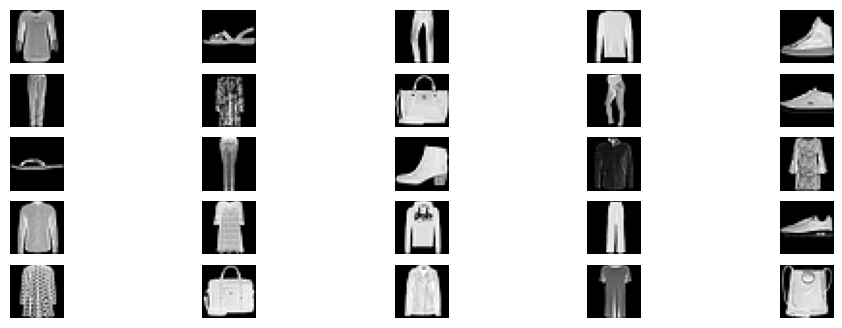

In [26]:
# Sample 25 EMNIST images from the training data and view the images
indices = np.random.randint(0,X_train.shape[0],size=25)

images = X_train[indices]
labels = y_train[indices]

plt.figure(figsize=(12,4))

for i in range(len(indices)):
  plt.subplot(5,5,i+1)
  image = images[i]
  plt.imshow(image,cmap='gray')
  plt.axis('off')

plt.show()
plt.close('all')

In [27]:
# Convert the pixel gray level values from the range [0, 255] to the range [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

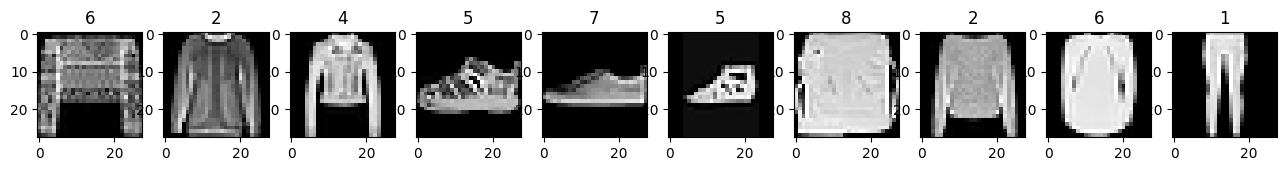

In [28]:
# View a few training data images and their corresponding labels
indices = np.random.randint(0, X_train.shape[0], size = 10)
plt.figure(figsize = (16, 8))

indexcount = 0
for data_index in indices:
    indexcount = indexcount + 1
    plt.subplot(1, 10, indexcount)
    plt.imshow(X_train[data_index], cmap = 'gray')
    plt.title(str(y_train[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

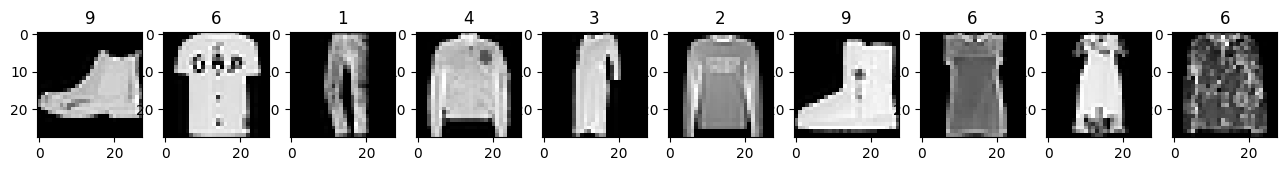

In [29]:
# View a few testing data images and their corresponding labels
indices = np.random.randint(0, X_test.shape[0], size = 10)
plt.figure(figsize = (16, 8))

indexcount = 0
for data_index in indices:
    indexcount = indexcount + 1
    plt.subplot(1, 10, indexcount)
    plt.imshow(X_test[data_index], cmap = 'gray')
    plt.title(str(y_test[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

In [30]:
# Convert the class labels to one-hot encoded vectors using the 'to_categorical()' function
num_classes = 10

# Note: Reduce all y labels by 1 to ensure that labeling starts at 0 and ends at 25
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

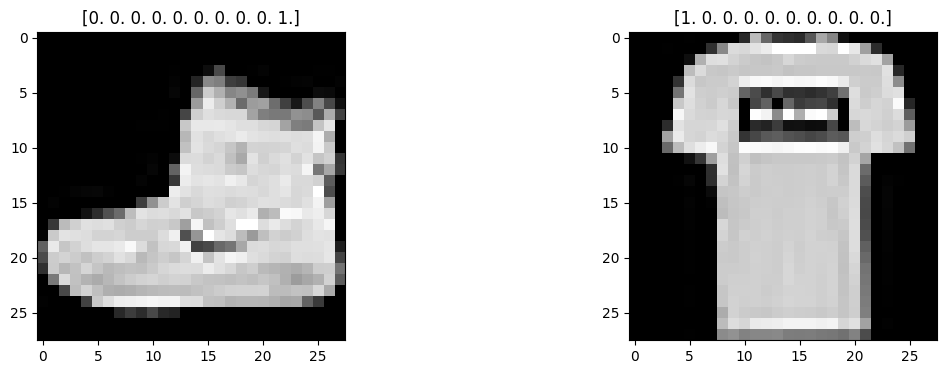

In [31]:
# View a couple of training data images and their corresponding labels
plt.figure(figsize=(14,4))

for data_index in np.arange(0,2,1):
  plt.subplot(1,2,data_index+1)
  plt.imshow(X_train[data_index],cmap='gray')
  plt.title(str(y_train[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

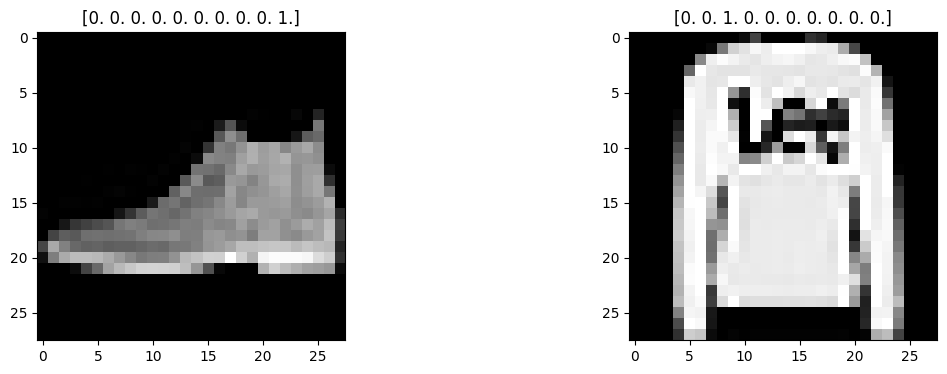

In [32]:
# View a couple of testing data images and their corresponding labels
plt.figure(figsize = (14, 4))

for data_index in np.arange(0, 2, 1):
    plt.subplot(1, 2, data_index + 1)
    plt.imshow(X_test[data_index], cmap = 'gray')
    plt.title(str(y_test[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

In [33]:
# Flatten the images by converting them into a list of values
image_vector_size = 28*28

X_train = X_train.reshape(X_train.shape[0],image_vector_size)
X_test = X_test.reshape(X_test.shape[0],image_vector_size)

# Task 2 - FCFNN

- Build a simple neural network (1 hidden layer and 2 neurons in the hidden layer) using *keras* and train it on the training data
- Check its performance on the testing data

In [34]:
# Create a neural network with 1 hidden layer and 2 neurons in the hidden layer and train it on the training data
nn1 = Sequential()

nn1.add(Dense(32,input_shape=(image_vector_size,),activation='sigmoid'))

nn1.add(Dense(num_classes,activation='softmax'))

nn1.compile(loss='categorical_crossentropy',metrics='accuracy')

nn1.summary()
print('\n')
nn1_history = nn1.fit(X_train,y_train,epochs=200,batch_size=X_train.shape[0],validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 2.3754 - accuracy: 0.1009 - val_loss: 2.2080 - val_accuracy: 0.2379
Epoch 2/200
1/1 [==============================] - 1s 572ms/step - loss: 2.2086 - accuracy: 0.2320 - val_loss: 2.1146 - val_accuracy: 0.3037
Epoch 3/200
1/1 [==============================] - 0s 384ms/step - loss: 2.1161 - accuracy: 0.3007 - val_loss: 2.0454 - val_accuracy: 0

In [35]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x:x+1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,2.375405,0.100875,2.208004,0.237917
2,2.208611,0.232000,2.114590,0.303667
3,2.116114,0.300667,2.045443,0.403667
4,2.047187,0.398271,1.988795,0.436833
5,1.991329,0.439146,1.941213,0.540167
...,...,...,...,...
196,0.625989,0.810708,0.625406,0.806250
197,0.624379,0.811688,0.623590,0.809250
198,0.622786,0.811250,0.622349,0.806917


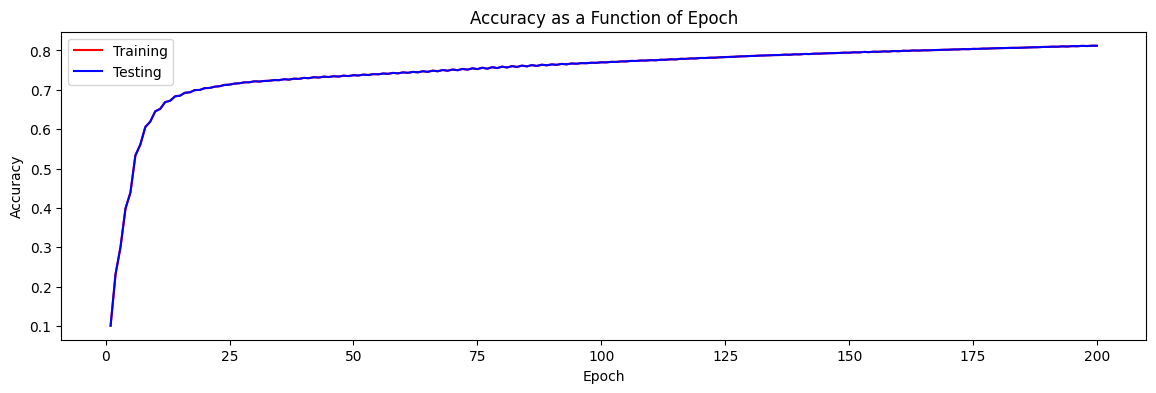

In [36]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data=hist,x='epoch',y='accuracy',color='red',label='Training')
sns.lineplot(data=hist,x='epoch',y='accuracy',color='blue',label='Testing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

# Task 3 - FCFNN Hyperparameter Tuning: Number of Neurons

- Build a neural network (1 hidden layer and tuned for number of neurons) using *keras* and train it on the training data
- View the impact of number of neurons on the accuracy of the model

In [37]:
# Declare a range of number of neurons per hidden layer to tune for
n_neurons_list = [2, 8, 32, 128]

# Create and train a neural network model for each value of number of neurons per hidden layer
performance_df = pd.DataFrame(data=None)
hist = [None]*4
indexcount = -1

for n_neu in n_neurons_list:
  indexcount = indexcount + 1
  nn = Sequential()

  nn.add(Dense(n_neu,input_shape=(image_vector_size,),activation='sigmoid'))

  nn.add(Dense(num_classes,activation='softmax'))

  nn.compile(loss='categorical_crossentropy',metrics='accuracy')

  print('\n Training and validation for {} neurons - START \n'.format(n_neu))
  nn.summary()
  print('\n')
  nn_history = nn.fit(X_train,y_train,batch_size=X_train.shape[0],validation_split=0.2,epochs=200)
  print('\n Training and validation for {} neurons - END \n'.format(n_neu))

  hist[indexcount] = pd.DataFrame(nn_history.history)
  hist[indexcount]['epoch'] = nn_history.epoch

  tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Number of Neurons': n_neu,
                                  'Train Accuracy': hist[indexcount]['accuracy'][199],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][199]})

  performance_df = pd.concat([performance_df, tempdf])





 Training and validation for 2 neurons - START 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 1600 (6.25 KB)
Trainable params: 1600 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.4188 - accuracy: 0.0993 - val_loss: 2.3531 - val_accuracy: 0.1030
Epoch 2/200
1/1 [==============================] - 0s 297ms/step - loss: 2.3564 - accuracy: 0.0993 - val_loss: 2.3280 - val_accuracy: 0.1030
Epoch 3/200
1/1 [==============================] - 0s 320ms/step - loss: 2.3306 - accur

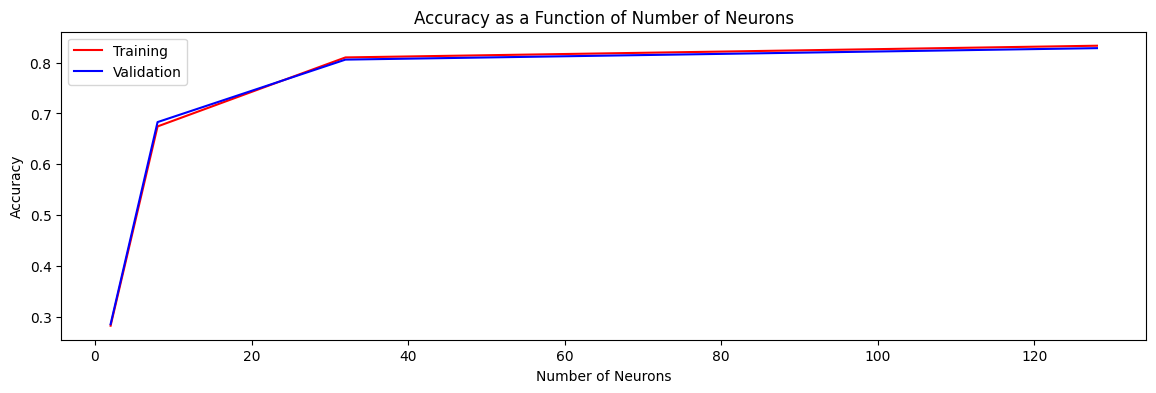

In [38]:
# View the training and validation accuracies as functions of number of neurons
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Number of Neurons', y = 'Train Accuracy', color = 'red', label = 'Training')
sns.lineplot(data = performance_df, x = 'Number of Neurons', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Number of Neurons');

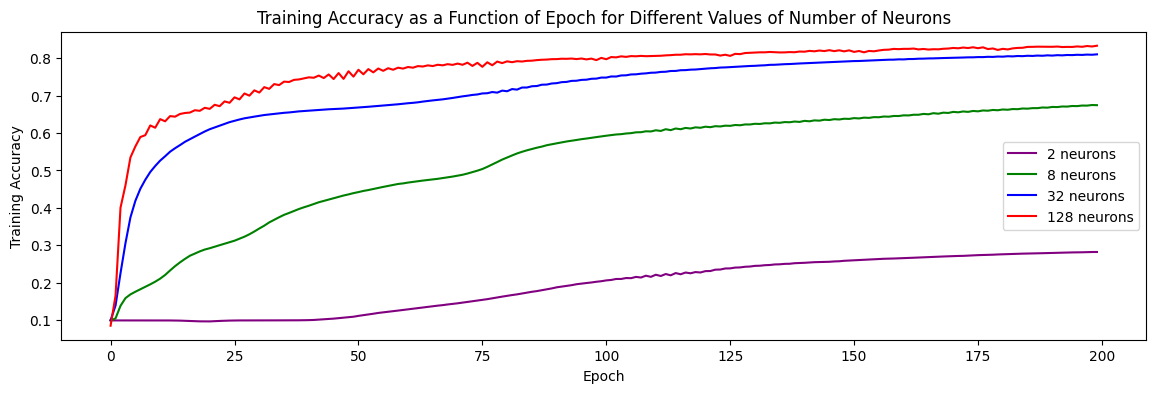

In [39]:
# View the training accuracies as functions of epochs for different values of number of neurons
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_neu in n_neurons_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = str(n_neu) + ' neurons')

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Number of Neurons');

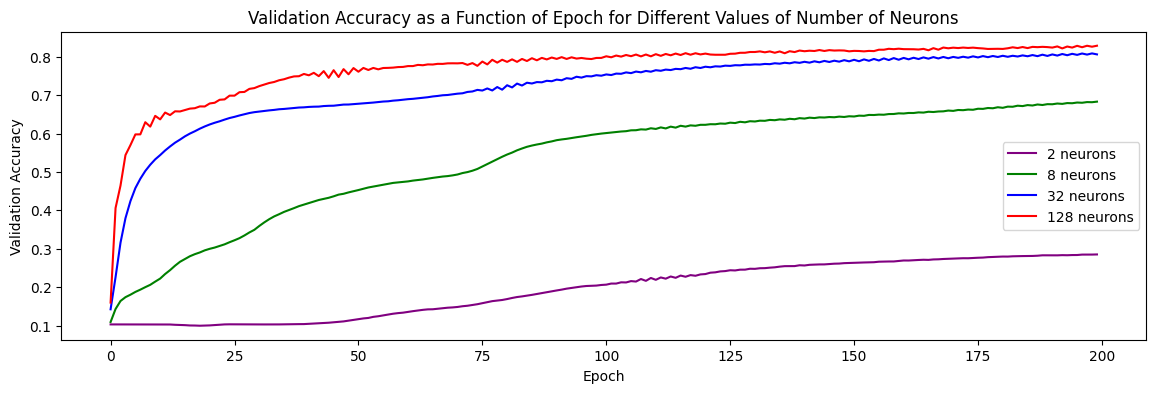

In [40]:
# View the validation accuracies as functions of epochs for different values of number of neurons
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_neu in n_neurons_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = str(n_neu) + ' neurons')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Number of Neurons');

# Task 4 - FCFNN Hyperparameter Tuning: Number of Hidden Layers

- Build a neural network (2 neurons per hidden layer and tuned for the number of hidden layers) using *keras* and train it on the training data
- View the impact of number of hidden layers on the accuracy of the model

In [41]:
# Declare a range of number of hidden layers to tune for
n_hidden_list = [1, 2, 3, 4]

# Create and train a neural network model for each value of number of hidden layers
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for n_hid in n_hidden_list:
    indexcount = indexcount + 1

    nn = Sequential()

    nn.add(Dense(units = 2,
                 input_shape = (image_vector_size, ),
                 activation = 'sigmoid'))

    for temp_n_hid in np.arange(1, n_hid, 1):
        nn.add(Dense(units = 2,
                     activation = 'sigmoid'))

    nn.add(Dense(units = num_classes,
                 activation = 'softmax'))

    nn.compile(loss = 'categorical_crossentropy',
               metrics = 'accuracy')

    print('\n Training and validation for {} hidden layers - START \n'.format(n_hid))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
    print('\n Training and validation for {} hidden layers - END \n'.format(n_hid))

    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch

    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Number of Hidden Layers': n_hid,
                                  'Train Accuracy': hist[indexcount]['accuracy'][199],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][199]})

    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for 1 hidden layers - START 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 1570      
                                                                 
 dense_11 (Dense)            (None, 10)                30        
                                                                 
Total params: 1600 (6.25 KB)
Trainable params: 1600 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.3248 - accuracy: 0.1001 - val_loss: 2.3010 - val_accuracy: 0.0995
Epoch 2/200
1/1 [==============================] - 0s 246ms/step - loss: 2.3009 - accuracy: 0.1001 - val_loss: 2.2937 - val_accuracy: 0.0995
Epoch 3/200
1/1 [==============================] - 0s 262ms/step - loss: 2.2937 -

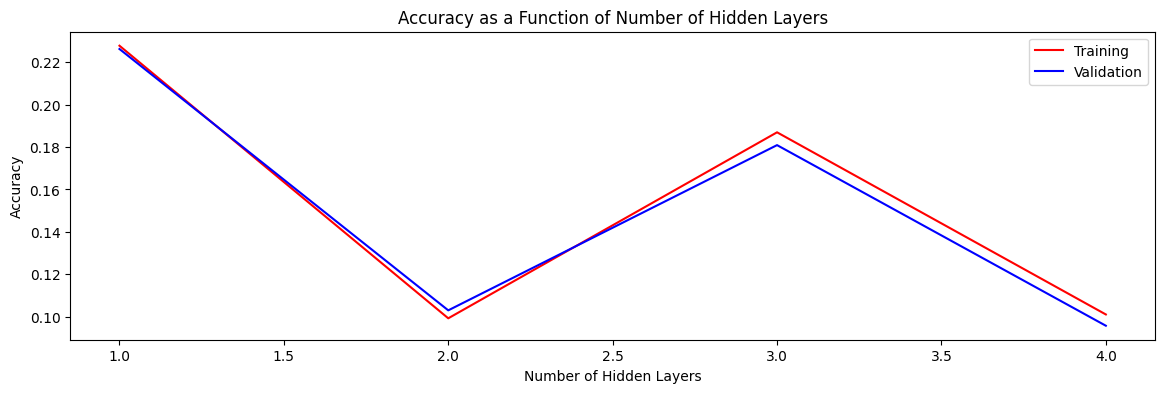

In [42]:
# View the training and validation accuracies as functions of number of hidden layers
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Number of Hidden Layers', y = 'Train Accuracy', color = 'red', label = 'Training')
sns.lineplot(data = performance_df, x = 'Number of Hidden Layers', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Number of Hidden Layers');

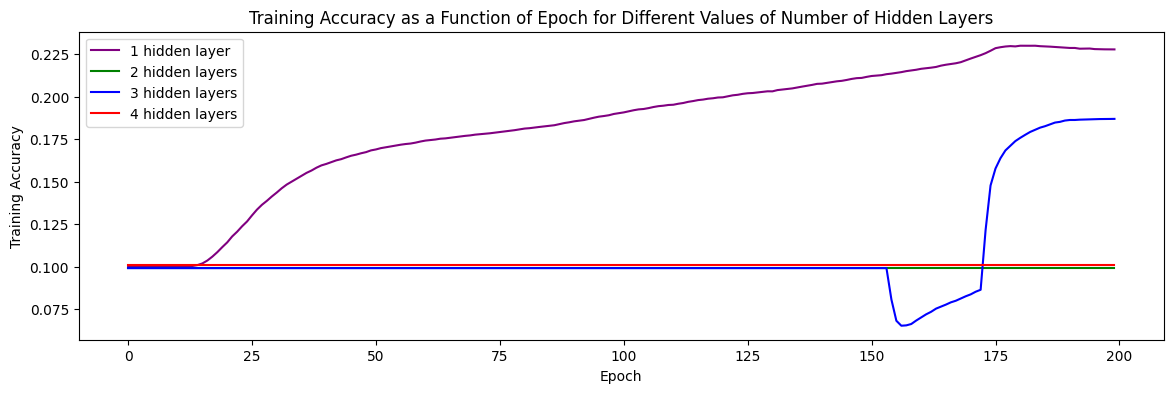

In [43]:
# View the training accuracies as functions of epochs for different values of number of hidden layers
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_hid in n_hidden_list:
    indexcount = indexcount + 1
    if n_hid == 1:
        currentlabel = '1 hidden layer'
    else:
        currentlabel = str(n_hid) + ' hidden layers'
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = currentlabel)

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Number of Hidden Layers');

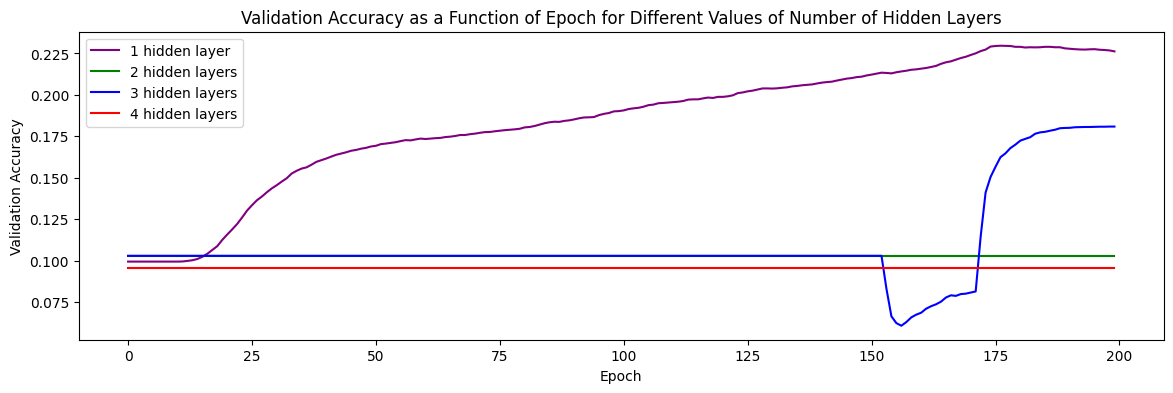

In [44]:
# View the validation accuracies as functions of epochs for different values of number of hidden layers
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for n_hid in n_hidden_list:
    indexcount = indexcount + 1
    if n_hid == 1:
        currentlabel = '1 hidden layer'
    else:
        currentlabel = str(n_hid) + ' hidden layers'
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = currentlabel)

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Number of Hidden Layers');

# Task 5 - FCFNN Hyperparameter Tuning: Combinations of Hyperparameters

- Build a neural network (tuned for both the number of hidden layers and the number of neurons per hidden layer) using *keras* and train it on the training data
- Test its performance on the testing data

In [51]:
def create_nn(n_hidden=1,n_neurons=8):
  nn = Sequential()

  nn.add(Dense(n_neurons,input_shape=(image_vector_size,),activation='sigmoid'))

  for n_hid in np.arange(1,n_hidden,1):
    nn.add(Dense(n_neurons,activation='sigmoid'))

  nn.add(Dense(num_classes,activation='softmax'))

  nn.compile(loss='categorical_crossentropy',metrics='accuracy')

  return (nn)

In [52]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
# Initialize a basic neural network object using the 'KerasClassifier()' method
# Note: Set the 'build_fn' parameter to 'create_nn'
base_grid_model = KerasClassifier(build_fn=create_nn,n_hidden=1,n_neurons=8)

# Define the range of the 'n_hidden' and 'n_neurons' parameters and store it in a parameter grid dictionary
param_grid = {'n_hidden':[1,2,3,4],'n_neurons':[32,128,256]}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
grid = GridSearchCV(estimator = base_grid_model,
                    param_grid = param_grid,
                    cv = 2,
                    verbose = 4)

grid_model = grid.fit(X_train, y_train, batch_size = X_train.shape[0], epochs = 200)

# Print the optimal values of 'n_hidden' and 'n_neurons'
best_n_hidden = grid_model.best_params_['n_hidden']
best_n_neurons = grid_model.best_params_['n_neurons']

print('The optimal value of number of hidden layers is', best_n_hidden)
print('The optimal value of number of neurons per hidden layer is', best_n_neurons)

Streaming output truncated to the last 5000 lines.
Epoch 114/200
1/1 [==============================] - 0s 223ms/step - loss: 1.7354 - accuracy: 0.2921
Epoch 115/200
1/1 [==============================] - 0s 246ms/step - loss: 1.7316 - accuracy: 0.2937
Epoch 116/200
1/1 [==============================] - 0s 241ms/step - loss: 1.7279 - accuracy: 0.2966
Epoch 117/200
1/1 [==============================] - 0s 251ms/step - loss: 1.7242 - accuracy: 0.2992
Epoch 118/200
1/1 [==============================] - 0s 251ms/step - loss: 1.7206 - accuracy: 0.3015
Epoch 119/200
1/1 [==============================] - 0s 246ms/step - loss: 1.7170 - accuracy: 0.3044
Epoch 120/200
1/1 [==============================] - 0s 247ms/step - loss: 1.7134 - accuracy: 0.3080
Epoch 121/200
1/1 [==============================] - 0s 260ms/step - loss: 1.7099 - accuracy: 0.3123
Epoch 122/200
1/1 [==============================] - 0s 248ms/step - loss: 1.7064 - accuracy: 0.3153
Epoch 123/200
1/1 [=====================

In [53]:
# Create a neural network model with a combination of potentially optimal hyperparameter values and train the model
nn = Sequential()

nn.add(Dense(units = 128,
              input_shape = (image_vector_size, ),
              activation = 'sigmoid'))

nn.add(Dense(units = num_classes,
              activation = 'softmax'))

nn.compile(loss = 'categorical_crossentropy',
            metrics = 'accuracy')
# Capture the training history of the model
nn.summary()
print('\n')
nn_history =nn.fit(X_train,y_train,batch_size=X_train.shape[0],validation_split=0.2,epochs=200)

hist = pd.DataFrame(nn_history.history)
hist['epoch'] = nn_history.epoch

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 128)               100480    
                                                                 
 dense_135 (Dense)           (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 2.4817 - accuracy: 0.0987 - val_loss: 2.1061 - val_accuracy: 0.2855
Epoch 2/200
1/1 [==============================] - 1s 992ms/step - loss: 2.1057 - accuracy: 0.2850 - val_loss: 1.9357 - val_accuracy: 0.4417
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 1.9390 - accuracy: 0.4389 - val_loss: 1.8179 - val_accurac

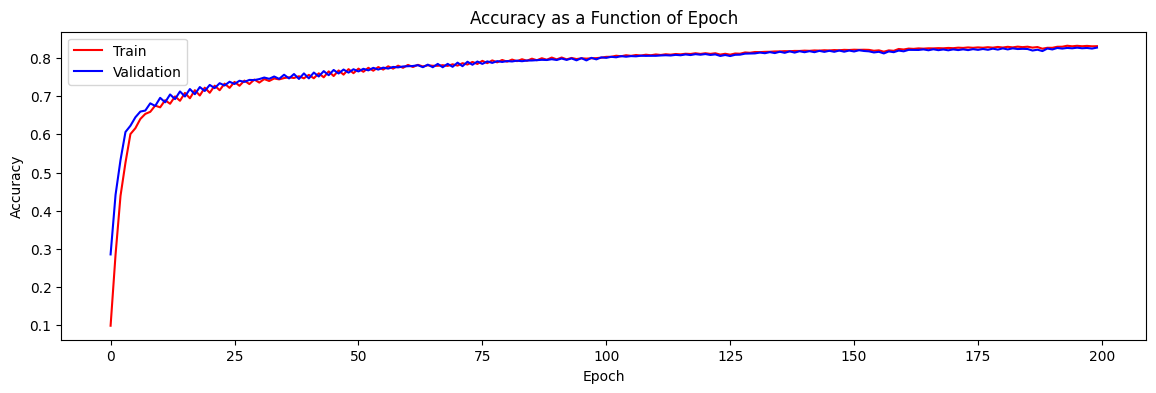

In [54]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [55]:
# Compute the accuracy of the model on the testing data set
performance_test = nn.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.5119 - accuracy: 0.8195
The loss value of the model on the test data is 0.5118803977966309
The accuracy of the model on the test data is 0.8195000290870667
